In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Load imports

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [0]:
import pandas as pd
metadata = pd.read_csv('/content/drive/My Drive/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [0]:
print(metadata['class'].value_counts())

street_music        1000
air_conditioner     1000
jackhammer          1000
dog_bark            1000
children_playing    1000
drilling            1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


In [0]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)


In [0]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display

#from helpers.wavfilehelper import WavFileHelper
wavfilehelper = WavFileHelper()
i=0
audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('/content/drive/My Drive/UrbanSound8K/UrbanSound8K/audio'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    print(i,' fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    i=i+1
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

Streaming output truncated to the last 5000 lines.
3733  fold1/ 17592-5-1-0.wav
3734  fold1/ 17592-5-1-1.wav
3735  fold1/ 17592-5-1-2.wav
3736  fold1/ 17592-5-1-3.wav
3737  fold4/ 176003-1-0-0.wav
3738  fold3/ 17615-3-0-0.wav
3739  fold3/ 17615-3-0-3.wav
3740  fold3/ 17615-3-0-4.wav
3741  fold3/ 17615-3-0-6.wav
3742  fold1/ 176257-3-0-0.wav
3743  fold1/ 176258-3-1-12.wav
3744  fold1/ 176258-3-1-13.wav
3745  fold1/ 176258-3-1-18.wav
3746  fold1/ 176258-3-1-2.wav
3747  fold3/ 176631-1-0-0.wav
3748  fold2/ 176634-1-0-0.wav
3749  fold1/ 176638-1-0-0.wav
3750  fold1/ 176638-1-1-0.wav
3751  fold4/ 176638-5-0-0.wav
3752  fold4/ 176638-5-0-1.wav
3753  fold4/ 176638-5-0-2.wav
3754  fold1/ 176714-2-0-18.wav
3755  fold1/ 176714-2-0-23.wav
3756  fold1/ 176714-2-0-26.wav
3757  fold1/ 176714-2-0-33.wav
3758  fold1/ 176714-2-0-40.wav
3759  fold1/ 176714-2-0-51.wav
3760  fold1/ 176714-2-0-55.wav
3761  fold1/ 176714-2-0-77.wav
3762  fold3/ 176783-3-0-11.wav
3763  fold3/ 176783-3-0-3.wav
3764  fold3/ 17

In [0]:
# num of channels 

print(audiodf.num_channels.value_counts(normalize=True))

2    0.915369
1    0.084631
Name: num_channels, dtype: float64


In [0]:
# sample rates 

print(audiodf.sample_rate.value_counts(normalize=True))

44100     0.614979
48000     0.286532
96000     0.069858
24000     0.009391
16000     0.005153
22050     0.005039
11025     0.004466
192000    0.001947
8000      0.001374
11024     0.000802
32000     0.000458
Name: sample_rate, dtype: float64


In [0]:
# bit depth

print(audiodf.bit_depth.value_counts(normalize=True))

16    0.659414
24    0.315277
32    0.019354
8     0.004924
4     0.001031
Name: bit_depth, dtype: float64


In [0]:
import librosa 
from scipy.io import wavfile as wav
import numpy as np

filename = '/content/drive/My Drive/UrbanSound8K/UrbanSound8K/audio/fold1/101415-3-0-2.wav' 

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate) 

Original sample rate: 48000
Librosa sample rate: 22050


In [0]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -27967 to 26427
Librosa audio file min~max range: -0.8541817 to 0.8053372


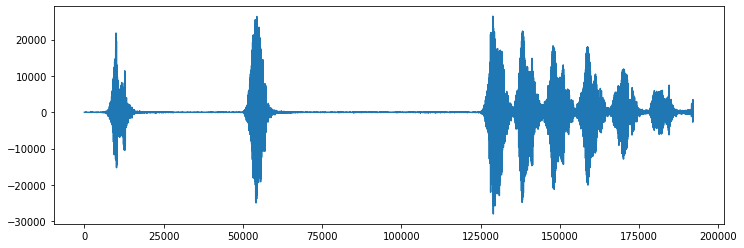

In [0]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

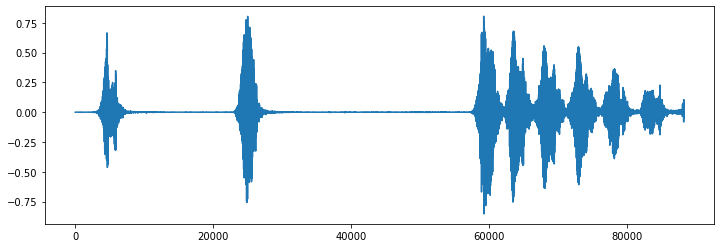

In [0]:
# Librosa audio with channels merged 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

In [0]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccsscaled

In [0]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = '/content/drive/My Drive/UrbanSound8K/UrbanSound8K/audio'

metadata = pd.read_csv('/content/drive/My Drive/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')

features = []
i=0
# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    print(i)
    class_label = row["class"]
    data = extract_features(file_name)
    i=i+1
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

Streaming output truncated to the last 5000 lines.
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
#le = LabelEncoder()
#yy = to_categorical(le.fit_transform(y)) 

In [0]:
yy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
x=[]
for i in range (8732):
  x.append(featuresdf.feature[i])

In [0]:
y = np.array(featuresdf.class_label.tolist())
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [0]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [0]:
x_train.shape

(6985,)

In [0]:
x_train=[]
for i in range (6984):
  x.append(list(x_train[i]))

IndexError: ignored

In [0]:
list(x_train[0])

[-88.92953108155189,
 117.30896887451637,
 -98.37564672451231,
 -7.985008530566327,
 -30.22047046873214,
 16.874998173141538,
 17.15483420536299,
 30.923129564432816,
 -17.133341082165096,
 20.054821028109437,
 -2.7485822276576743,
 7.960058929895056,
 -9.574344907911112,
 -14.493120820870285,
 1.0371258917734225,
 18.054027477034808,
 1.842255436336825,
 14.454555488296453,
 -5.322403190680533,
 7.843890360835052,
 -0.5155281655105544,
 -4.210981016115917,
 -2.514994549713129,
 2.175783597751082,
 2.1852411977793893,
 6.4192629280371305,
 -0.4312598840520753,
 0.2797779837214119,
 2.718538016593974,
 0.36092933697825597,
 0.3542125744086521,
 -3.538388730835032,
 1.4708129200220155,
 2.816635841028549,
 0.25508843329613734,
 -0.0959455537292825,
 -0.3506532613624304,
 2.1891289412938515,
 5.627493076026512,
 -3.9032336206445115]

In [0]:
x_train.shape

(6985,)

In [0]:
y_train.shape

(6985,)

In [0]:
#training on svm 
import sklearn as sk
classifier_name = 'Support Vector Machine (SVM)'
svm = sk.svm.SVC(C=0.1, kernel='linear', random_state=20150420)
svm.fit(x_train,y_train)

ValueError: ignored

In [0]:
#Testing  
train_predictions = svm.predict(x_train)
train_acc = 100. * float(sum(train_predictions == y_train))/y_train.shape[0]
print ('Training accuracy = %0.2f%%' % train_acc)

test_predictions = svm.predict(x_test)
test_acc = 100. * float(sum(test_predictions == y_test))/y_test.shape[0]
print ('Test set accuracy = %0.2f%%' % test_acc)

Training accuracy = 69.46%
Test set accuracy = 65.25%


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64       203
           1       0.75      0.78      0.77        86
           2       0.60      0.56      0.58       183
           3       0.62      0.69      0.65       201
           4       0.63      0.60      0.61       206
           5       0.74      0.69      0.71       193
           6       0.68      0.26      0.38        72
           7       0.72      0.74      0.73       208
           8       0.79      0.81      0.80       165
           9       0.57      0.51      0.54       230

    accuracy                           0.65      1747
   macro avg       0.67      0.64      0.64      1747
weighted avg       0.66      0.65      0.65      1747



In [0]:
x_train.shape

(6985,)

In [0]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
GaussianNB()

#Testing  
train_predictions = clf.predict(x_train)
train_acc = 100. * float(sum(train_predictions == y_train))/y_train.shape[0]
print ('Training accuracy = %0.2f%%' % train_acc)

test_predictions = clf.predict(x_test)
test_acc = 100. * float(sum(test_predictions == y_test))/y_test.shape[0]
print ('Test set accuracy = %0.2f%%' % test_acc)

print(classification_report(y_test,test_predictions))

Training accuracy = 49.15%
Test set accuracy = 48.83%
              precision    recall  f1-score   support

           0       0.47      0.41      0.44       203
           1       0.56      0.67      0.61        86
           2       0.35      0.50      0.41       183
           3       0.61      0.43      0.51       201
           4       0.58      0.43      0.49       206
           5       0.60      0.40      0.48       193
           6       0.31      0.71      0.43        72
           7       0.48      0.75      0.59       208
           8       0.57      0.55      0.56       165
           9       0.54      0.30      0.38       230

    accuracy                           0.49      1747
   macro avg       0.51      0.52      0.49      1747
weighted avg       0.52      0.49      0.48      1747



In [0]:
train_x=x_train
train_y=y_train
test_x=x_test
test_y=y_test

In [0]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0, tol=1e-10)
lsvc.fit(train_x, train_y)

#Testing  
train_predictions = lsvc.predict(train_x)
train_acc = 100. * float(sum(train_predictions == train_y))/train_y.shape[0]
print ('Training accuracy = %0.2f%%' % train_acc)

test_predictions = lsvc.predict(test_x)
test_acc = 100. * float(sum(test_predictions == test_y))/test_y.shape[0]
print ('Test set accuracy = %0.2f%%' % test_acc)

print(classification_report(test_y,test_predictions))

Training accuracy = 38.94%
Test set accuracy = 36.58%
              precision    recall  f1-score   support

           0       0.37      0.33      0.35       203
           1       0.91      0.62      0.74        86
           2       0.43      0.16      0.24       183
           3       0.44      0.02      0.04       201
           4       0.24      0.46      0.32       206
           5       0.23      0.74      0.35       193
           6       0.09      0.01      0.02        72
           7       0.59      0.55      0.57       208
           8       0.65      0.67      0.66       165
           9       0.88      0.10      0.17       230

    accuracy                           0.37      1747
   macro avg       0.48      0.37      0.34      1747
weighted avg       0.49      0.37      0.33      1747



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(train_x, train_y)

#Testing  
train_predictions = lr.predict(train_x)
train_acc = 100. * float(sum(train_predictions == train_y))/train_y.shape[0]
print ('Training accuracy = %0.2f%%' % train_acc)

test_predictions = lr.predict(test_x)
test_acc = 100. * float(sum(test_predictions == test_y))/test_y.shape[0]
print ('Test set accuracy = %0.2f%%' % test_acc)

print(classification_report(test_y,test_predictions))

Training accuracy = 57.12%
Test set accuracy = 56.15%
              precision    recall  f1-score   support

           0       0.41      0.51      0.46       203
           1       0.88      0.76      0.81        86
           2       0.49      0.53      0.51       183
           3       0.63      0.65      0.64       201
           4       0.53      0.49      0.51       206
           5       0.55      0.50      0.52       193
           6       0.48      0.14      0.22        72
           7       0.60      0.74      0.66       208
           8       0.73      0.80      0.76       165
           9       0.47      0.41      0.44       230

    accuracy                           0.56      1747
   macro avg       0.58      0.55      0.55      1747
weighted avg       0.56      0.56      0.56      1747



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(train_x, train_y)

#Testing  
train_predictions = dt.predict(train_x)
train_acc = 100. * float(sum(train_predictions == train_y))/train_y.shape[0]
print ('Training accuracy = %0.2f%%' % train_acc)

test_predictions = dt.predict(test_x)
test_acc = 100. * float(sum(test_predictions == test_y))/test_y.shape[0]
print ('Test set accuracy = %0.2f%%' % test_acc)

print(classification_report(test_y,test_predictions))

Training accuracy = 100.00%
Test set accuracy = 69.32%
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       203
           1       0.63      0.60      0.62        86
           2       0.52      0.58      0.55       183
           3       0.67      0.66      0.66       201
           4       0.73      0.71      0.72       206
           5       0.83      0.83      0.83       193
           6       0.60      0.68      0.64        72
           7       0.76      0.74      0.75       208
           8       0.70      0.77      0.73       165
           9       0.62      0.48      0.54       230

    accuracy                           0.69      1747
   macro avg       0.68      0.69      0.69      1747
weighted avg       0.69      0.69      0.69      1747



In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(train_x, train_y)

#Testing  
train_predictions = abc.predict(train_x)
train_acc = 100. * float(sum(train_predictions == train_y))/train_y.shape[0]
print ('Training accuracy = %0.2f%%' % train_acc)

test_predictions = abc.predict(test_x)
test_acc = 100. * float(sum(test_predictions == test_y))/test_y.shape[0]
print ('Test set accuracy = %0.2f%%' % test_acc)

print(classification_report(test_y,test_predictions))

Training accuracy = 45.08%
Test set accuracy = 43.85%
              precision    recall  f1-score   support

           0       0.43      0.42      0.43       203
           1       0.39      0.79      0.53        86
           2       0.45      0.35      0.40       183
           3       0.40      0.34      0.37       201
           4       0.41      0.35      0.38       206
           5       0.46      0.38      0.42       193
           6       0.25      0.64      0.36        72
           7       0.55      0.55      0.55       208
           8       0.64      0.56      0.60       165
           9       0.43      0.35      0.39       230

    accuracy                           0.44      1747
   macro avg       0.44      0.47      0.44      1747
weighted avg       0.46      0.44      0.44      1747



Text(0, 0.5, 'Error Rate')

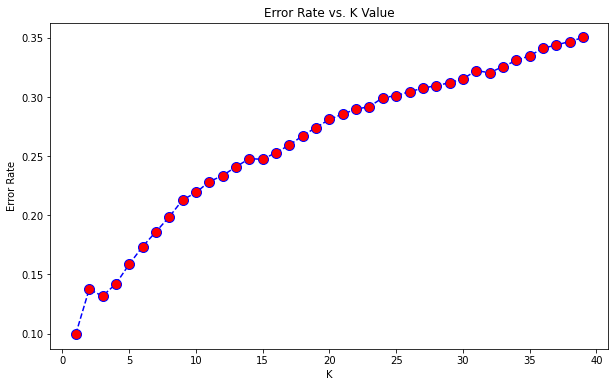

In [0]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))


plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(train_x, train_y)

#Testing  
train_predictions = knn.predict(train_x)
train_acc = 100. * float(sum(train_predictions == train_y))/train_y.shape[0]
print ('Training accuracy = %0.2f%%' % train_acc)

test_predictions = knn.predict(test_x)
test_acc = 100. * float(sum(test_predictions == test_y))/test_y.shape[0]
print ('Test set accuracy = %0.2f%%' % test_acc)

print(classification_report(test_y,test_predictions))

Training accuracy = 76.76%
Test set accuracy = 73.27%
              precision    recall  f1-score   support

           0       0.66      0.91      0.77       203
           1       0.95      0.48      0.64        86
           2       0.54      0.81      0.65       183
           3       0.82      0.62      0.71       201
           4       0.77      0.67      0.71       206
           5       0.80      0.77      0.78       193
           6       0.68      0.60      0.64        72
           7       0.82      0.88      0.84       208
           8       0.83      0.86      0.85       165
           9       0.73      0.55      0.63       230

    accuracy                           0.73      1747
   macro avg       0.76      0.71      0.72      1747
weighted avg       0.75      0.73      0.73      1747



In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(train_x, train_y)

#Testing  
train_predictions = rf.predict(train_x)
train_acc = 100. * float(sum(train_predictions == train_y))/train_y.shape[0]
print ('Training accuracy = %0.2f%%' % train_acc)

test_predictions = rf.predict(test_x)
test_acc = 100. * float(sum(test_predictions == test_y))/test_y.shape[0]
print ('Test set accuracy = %0.2f%%' % test_acc)

print(classification_report(test_y,test_predictions))

Training accuracy = 47.50%
Test set accuracy = 45.96%
              precision    recall  f1-score   support

           0       0.35      0.13      0.19       203
           1       0.88      0.57      0.69        86
           2       0.30      0.35      0.32       183
           3       0.51      0.70      0.59       201
           4       0.54      0.52      0.53       206
           5       0.38      0.58      0.46       193
           6       0.00      0.00      0.00        72
           7       0.44      0.82      0.57       208
           8       0.72      0.56      0.63       165
           9       0.37      0.18      0.24       230

    accuracy                           0.46      1747
   macro avg       0.45      0.44      0.42      1747
weighted avg       0.45      0.46      0.43      1747



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
### store the preprocessed data for use in the next notebook

%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le


Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)


In [0]:
# retrieve the preprocessed data from previous notebook

%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r yy 
%store -r le

In [0]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import numpy as np
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras import Sequential
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [0]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [0]:
x_test

array([[-8.21235894e+01,  1.39505916e+02, -4.24308649e+01, ...,
        -5.02371148e-01, -2.60428533e+00, -1.05346291e+00],
       [-1.57440054e+01,  1.24119960e+02, -2.94288813e+01, ...,
         8.23705630e-01,  1.71932210e+00, -3.31462349e-01],
       [-1.23393651e+02,  1.51819463e+01, -5.00933290e+01, ...,
         1.57439023e+00, -3.99674190e+00,  3.24574944e+00],
       ...,
       [-4.05091674e+02,  1.55382151e+02,  3.08756216e+01, ...,
        -3.30258332e+00, -3.44398601e+00, -6.52839691e-01],
       [-1.69869082e+02,  9.26223982e+01, -4.04844988e+00, ...,
         1.87711655e-01, -3.35710560e+00, -3.33799714e+00],
       [-1.96620974e+02,  1.52144648e+02, -5.74574410e+01, ...,
        -1.52897450e+00, -2.82955607e+00, -3.17450853e+00]])

In [0]:
y_test.shape

(1747,)

In [0]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

UnimplementedError: ignored

In [0]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

#checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


ValueError: ignored

In [0]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9244094488188976
Testing Accuracy:  0.8677733255306106


In [0]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

In [0]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [0]:
# Class: Air Conditioner

filename = '/content/drive/My Drive/UrbanSound8K/UrbanSound8K/audio/fold5/100852-0-0-0.wav' 
print_prediction(filename) 

The predicted class is: air_conditioner 

air_conditioner 		 :  0.99898797273635864257812500000000
car_horn 		 :  0.00000521959191246423870325088501
children_playing 		 :  0.00048881769180297851562500000000
dog_bark 		 :  0.00002907494854298420250415802002
drilling 		 :  0.00029467503190971910953521728516
engine_idling 		 :  0.00001140154927270486950874328613
gun_shot 		 :  0.00000218410104935173876583576202
jackhammer 		 :  0.00002033507735177408903837203979
siren 		 :  0.00000161386367381055606529116631
street_music 		 :  0.00015880886348895728588104248047


In [0]:
import numpy as np
max_pad_len = 174

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [0]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = '/content/drive/My Drive/UrbanSound8K/UrbanSound8K/audio'

metadata = pd.read_csv('/content/drive/My Drive/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')

features = []
i=0
# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    print(i)
    features.append([data, class_label])
    i=i+1
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

Streaming output truncated to the last 5000 lines.
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

Using TensorFlow backend.


NameError: ignored

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax')) 

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [0]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 41, 64)        

In [0]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 128

num_epochs = 72
num_batch_size = 256

#checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 6985 samples, validate on 1747 samples
Epoch 1/72
6985/6985 [==============================] - 31s 5ms/step - loss: 5.4362 - acc: 0.1499 - val_loss: 2.2405 - val_acc: 0.1712
Epoch 2/72
6985/6985 [==============================] - 31s 4ms/step - loss: 2.1010 - acc: 0.2683 - val_loss: 1.9815 - val_acc: 0.3223
Epoch 3/72
6985/6985 [==============================] - 31s 5ms/step - loss: 1.7249 - acc: 0.3784 - val_loss: 1.7314 - val_acc: 0.4070
Epoch 4/72
6985/6985 [==============================] - 32s 5ms/step - loss: 1.5505 - acc: 0.4508 - val_loss: 1.5991 - val_acc: 0.4631
Epoch 5/72
6985/6985 [==============================] - 32s 5ms/step - loss: 1.4179 - acc: 0.4968 - val_loss: 1.4844 - val_acc: 0.4877
Epoch 6/72
6985/6985 [==============================] - 32s 5ms/step - loss: 1.3336 - acc: 0.5321 - val_loss: 1.3970 - val_acc: 0.5432
Epoch 7/72
6985/6985 [==============================] - 32s 5ms/step - loss: 1.2551 - acc: 0.5569 - val_loss: 1.3278 - val_acc: 0.5644
Epoch 8

In [0]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9460272011453114
Testing Accuracy:  0.8820835719056722


In [0]:
def print_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [0]:
# Class: Air Conditioner

filename = '/content/drive/My Drive/UrbanSound8K/UrbanSound8K/audio/fold5/100852-0-0-0.wav' 
print_prediction(filename)

The predicted class is: air_conditioner 

air_conditioner 		 :  0.97438055276870727539062500000000
car_horn 		 :  0.00000056648036661499645560979843
children_playing 		 :  0.00024824315914884209632873535156
dog_bark 		 :  0.00122854672372341156005859375000
drilling 		 :  0.02365098521113395690917968750000
engine_idling 		 :  0.00004783226177096366882324218750
gun_shot 		 :  0.00000616460783930961042642593384
jackhammer 		 :  0.00012540475290734320878982543945
siren 		 :  0.00028925552032887935638427734375
street_music 		 :  0.00002250462057418189942836761475
